In [2]:
import nltk
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
)
from nltk.corpus import stopwords

In [3]:
def read_yelp():
    """
    Read in the cleaned Yelp as "chunks", which are smaller and can be rejoined
    #to recreate whole dataset without crashing pandas.
    This will take between 4 and 5 minutes.
    #Source: https://stackoverflow.com/questions/46790390/how-to-read-a-large-json-in-pandas
    """
    yelp_data = pd.read_csv(
        "/Users/necabotheking/Documents/Github/ml-affordable-care-act/ml-affordable-care-act/data/yelp_true_sample_100k.csv"
    )

    return yelp_data


yelp_data = read_yelp()
yelp_data

,Unnamed: 0,stars,text,date
0,0,1,I ordered online for curbside pickup.I was inf...,2021-09-26 14:29:01
1,1,3,This place has really nice staffs but the food...,2016-03-25 23:09:51
2,2,5,Grilled oyster is def the best in French quart...,2019-12-28 20:17:36
3,3,4,Started going to this place about 6 months ago...,2014-10-25 20:47:28
4,4,4,Discovered Foghorn on a Sunday evening while s...,2016-10-10 19:23:47
...,...,...,...,...
99995,99995,5,"A & L was awesome. For months, and ""I can do i...",2019-04-17 13:08:41
99996,99996,5,Steinbeck is a wonderful and caring veterinari...,2018-02-10 04:21:45
99997,99997,5,What a great restaurant! It's a modest restau...,2021-10-03 10:12:12
99998,99998,2,stopped at this Ihop after dropping the dog of...,2012-08-05 00:27:42


In [4]:
yelp_data = pd.read_csv(
    "/Users/necabotheking/Documents/Github/ml-affordable-care-act/ml-affordable-care-act/data/yelp_true_sample_100k.csv"
)

In [5]:
def preprocess_text(data_frame):
    """
    Inputs:
        data_frame: Pandas Dataframe

    Returns: data_frame: Pandas Dataframe modified in place
    """
    stop_words = stopwords.words("english")

    data_frame["text"] = data_frame["text"].apply(
        lambda x: " ".join(
            [word for word in x.split() if word.lower() not in (stop_words)]
        )
    )

    return data_frame


yelp_data = preprocess_text(yelp_data)
yelp_data

,Unnamed: 0,stars,text,date
0,0,1,ordered online curbside pickup.I informed 30mi...,2021-09-26 14:29:01
1,1,3,place really nice staffs food got best.The ric...,2016-03-25 23:09:51
2,2,5,Grilled oyster def best French quarter. tried ...,2019-12-28 20:17:36
3,3,4,Started going place 6 months ago become apart ...,2014-10-25 20:47:28
4,4,4,Discovered Foghorn Sunday evening searching on...,2016-10-10 19:23:47
...,...,...,...,...
99995,99995,5,"& L awesome. months, ""I myself"", rattling frid...",2019-04-17 13:08:41
99996,99996,5,Steinbeck wonderful caring veterinarian practi...,2018-02-10 04:21:45
99997,99997,5,great restaurant! modest restaurant nice peopl...,2021-10-03 10:12:12
99998,99998,2,stopped Ihop dropping dog TWB2. closest locati...,2012-08-05 00:27:42


In [6]:
yelp_data["sentiment"] = yelp_data["stars"].apply(lambda x: 0 if x <= 2 else 1)
yelp_data

,Unnamed: 0,stars,text,date,sentiment
0,0,1,ordered online curbside pickup.I informed 30mi...,2021-09-26 14:29:01,0
1,1,3,place really nice staffs food got best.The ric...,2016-03-25 23:09:51,1
2,2,5,Grilled oyster def best French quarter. tried ...,2019-12-28 20:17:36,1
3,3,4,Started going place 6 months ago become apart ...,2014-10-25 20:47:28,1
4,4,4,Discovered Foghorn Sunday evening searching on...,2016-10-10 19:23:47,1
...,...,...,...,...,...
99995,99995,5,"& L awesome. months, ""I myself"", rattling frid...",2019-04-17 13:08:41,1
99996,99996,5,Steinbeck wonderful caring veterinarian practi...,2018-02-10 04:21:45,1
99997,99997,5,great restaurant! modest restaurant nice peopl...,2021-10-03 10:12:12,1
99998,99998,2,stopped Ihop dropping dog TWB2. closest locati...,2012-08-05 00:27:42,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    yelp_data["text"], yelp_data["sentiment"], test_size=0.2, random_state=123
)

# Define TF-IDF vectorizer and fit to the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform testing data using the same vectorizer to prevent data leakage
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 80, 20 test/train split
print(X_train.shape)
print(X_test.shape)

(80000,)
(20000,)


In [8]:
yelp_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,49999.50000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
stars,100000.0,3.74764,1.478322,1.0,3.00,4.0,5.00,5.0
sentiment,100000.0,0.76912,0.421398,0.0,1.00,1.0,1.00,1.0


In [15]:
nn = MLPClassifier(
    hidden_layer_sizes=(8, 8, 8), activation="relu", solver="adam", max_iter=500
)
nn.fit(X_train_tfidf, y_train)

predict_train = nn.predict(X_train_tfidf)
predict_test = nn.predict(X_test_tfidf)

<AxesSubplot: >

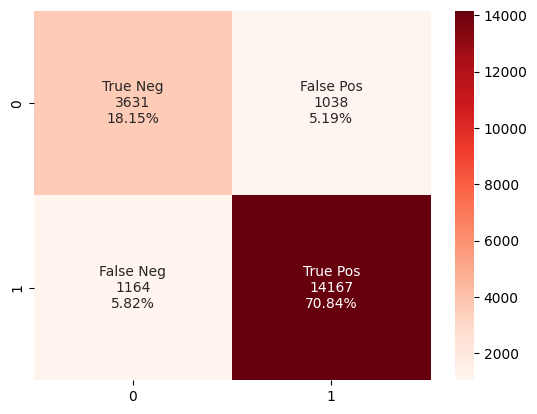

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test, predict_test)

names = ["True Neg", "False Pos", "False Neg", "True Pos"]
counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
percentages = ["{0:.2%}".format(value) for value in conf.flatten() / np.sum(conf)]
labels = [f"{x}\n{y}\n{z}" for x, y, z in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(conf, annot=labels, fmt="", cmap="Reds")

In [17]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4669
           1       0.93      0.92      0.93     15331

    accuracy                           0.89     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.89      0.89      0.89     20000



In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "hidden_layer_sizes": [(100,), (100, 50), (50,)],
    "max_iter": [200, 400, 600],
}
grid_search = GridSearchCV(nn, param_grid, cv=3)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(hidden_layer_sizes=(8, 8, 8),
                                     max_iter=500),
             param_grid={'hidden_layer_sizes': [(100,), (100, 50), (50,)],
                         'max_iter': [200, 400, 600]})

In [38]:
print("Best parameters found:\n", grid_search.best_params_)

Best parameters found:
 {'hidden_layer_sizes': (100, 50), 'max_iter': 200}
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      4669
           1       0.94      0.94      0.94     15331

    accuracy                           0.91     20000
   macro avg       0.88      0.87      0.87     20000
weighted avg       0.91      0.91      0.91     20000



array([[ 3756,   913],
       [  872, 14459]])

In [ ]:
grid_search.score(X_train_tfidf, y_train)

grid_prediction = grid_search.predict(X_test_tfidf)

print(classification_report(y_test, grid_prediction))
grid_search_matrix = confusion_matrix(y_test, grid_prediction)

<AxesSubplot: >

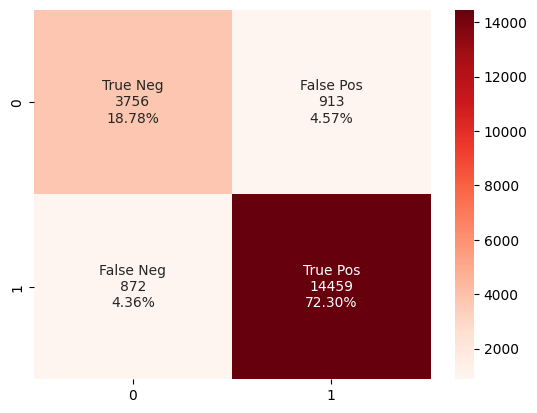

In [75]:
import seaborn as sns

names = ["True Neg", "False Pos", "False Neg", "True Pos"]
counts = ["{0:0.0f}".format(value) for value in grid_search_matrix.flatten()]
percentages = [
    "{0:.2%}".format(value)
    for value in grid_search_matrix.flatten() / np.sum(grid_search_matrix)
]
labels = [f"{x}\n{y}\n{z}" for x, y, z in zip(names, counts, percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(grid_search_matrix, annot=labels, fmt="", cmap="Reds")

In [76]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy = accuracy_score(y_test, grid_prediction)
print("Accuracy:", accuracy)

auc_score = roc_auc_score(y_test, grid_prediction)
print("AUC Score:", auc_score)

Accuracy: 0.91075
AUC Score: 0.8737883474003282
